In [26]:
import os
from classy import Class
from matplotlib import pyplot as plt
from fit import *

In [27]:
estimator = ['Pk']

multipoles = ['0','2']

k_edges = {
    'Pk': 
           {'0': [0.01, 0.18], 
            '2': [0.01, 0.18]},
            }

cov_mock_nb = 1000

In [28]:
cl = PrepareFit(estimator, multipoles, k_edges, cov_mock_nb)

In [29]:
data_dir = '/home/swang/share/rneveux/FirstGenMocks_AbacusSummit/CubicBox/LRG/z0.800/stable/powspec/'
    
name_file = {
    'Pk': 
           {'0': os.path.join(data_dir,'pk0_CubicBox_rsd_phmean_kpk'), 
            '2': os.path.join(data_dir,'pk2_CubicBox_rsd_phmean_kpk')},
            }

In [30]:
cl.data_prep(name_file)

In [31]:
cov_file = '/home/rneveux/covariance_matrix/cov_FirstGenMocks_EZmock_Cubic_LRG_z0.800_pk0_pk2_pk4.npy'
rescale = 1/25

In [32]:
cl.cov_prep(cov_name=cov_file, rescale=rescale)

In [33]:
window = False

mean_density = 1e-3

h_fid = .6736
omega_b_fid = .02237
omega_cdm_fid = .12
n_s_fid = .9649
A_s_fid = 2.0830e-9

cosmo_fid = {
                'output': 'mPk',
                'h': h_fid,
                'omega_b': omega_b_fid,
                'omega_cdm': omega_cdm_fid,
                'n_s': n_s_fid,
                'A_s': A_s_fid,
                'tau_reio': 0.0544,
                'N_ncdm': 1.,
                'omega_ncdm': .0006442,
                'N_ur': 2.0328,
                'z_max_pk': 4.5,
                'P_k_max_h/Mpc': 50.,
                }

direct_classpt = False
'''
prior = {
    'b1' : {'type': 'Uni', 'lim': [0, 4]},
    'b2' : {'type': 'Uni', 'lim': [-15, 15]},
    'bG2' : {'type': 'Uni', 'lim': [-15, 15]},
    'c0' : {'type': 'Uni', 'lim': [-1000, 1000]},
    'c2pp' : {'type': 'Uni', 'lim': [-1000, 1000]},
    'ch' : {'type': 'Uni', 'lim': [-1000, 1000]},
    'Pshot' : {'type': 'Uni', 'lim': [-10, 10]},
    'a0': {'type': 'Uni', 'lim': [-1000, 1000]},
    'omega_cdm' : { 'type': 'Fix', 'lim': .12},
    'omega_b': { 'type': 'Fix', 'lim': .02237},
    'h': {  'type': 'Fix', 'lim': .6736},
    'n_s': { 'type': 'Fix', 'lim': .9649},
    'ln10^{10}A_s': { 'type': 'Fix', 'lim': 3.044},
}
'''
prior = {
    'b1' : {'type': 'Uni', 'lim': [0, 4]},
    'b2' : {'type': 'Gauss', 'lim': [0, 1]},
    'bG2' : {'type': 'Gauss', 'lim': [0, 1]},
    'c0' : {'type': 'Gauss', 'lim': [4, 10]},
    'c2pp' : {'type': 'Gauss', 'lim': [20, 20]},
    'Pshot' : {'type': 'Gauss', 'lim': [0, 1]},
    'a0': {'type': 'Gauss', 'lim': [0, 1]},
    'omega_cdm' : { 'type': 'Fix', 'lim': .12},
    'omega_b': { 'type': 'Fix', 'lim': .02237},
    'h': {  'type': 'Fix', 'lim': .6736},
    'n_s': { 'type': 'Fix', 'lim': .9649},
    'ln10^{10}A_s': { 'type': 'Fix', 'lim': 3.044},
}

c_inference = False

for p in ['h', 'omega_b', 'omega_cdm', 'n_s', 'ln10^{10}A_s']:
    if prior[p]['type']!= 'Fix':
        c_inference = True
        if direct_classpt:
            c_inference = 'classpt'
            cosmo_classpt = cosmo_fid.copy()
            del cosmo_classpt['A_s']
        break
        
z_eff = 0.8

params = {'prior':prior, 'cosmo_inference':c_inference, 'z_eff':z_eff,
              'cosmo_fid':cosmo_fid, 'mean_density':mean_density, 'window':window}
          
save_directory = 'home/rneveux/test_results'
name_save = 'test'

In [36]:
cl.fit(save_directory, name_save, params, minuit=True, minos=['b1'])

In [37]:
cl.m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 132.4                      │             Nfcn = 5463              │
│ EDM = 0.00014 (Goal: 0.0002)     │            time = 0.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b1    │   1.994   │   0.010   │   -0.010   │   0.010    │  1e-10  │    4    │       │
│ 1 │ b2    │   8.74    │   0.06    │            │            │   -15   │   15    │       │
│ 2 │ bG2   │   0.36    │   0.09    │            │            │   -15   │   15    │       │
│ 3 │ c0    │    -33    │     6     │            │            │  -1000  │  1000   │       │
│ 4 │ c2pp  │    117    │     6     │            │            │  -1000  │  1000   │       │
│ 5 │ ch    │    710    │    40     │            │            │  -1000  │  1000   │       │
│ 6 │ Pshot │    0.9    │    0.6    │            │            │   -10   │   10    │       │
│ 7 │ a0    │   146.4   │    3.2    │            │            │  -1000  │  1000   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          b1           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.01   │   0.01    │
│  Valid   │   False   │   False   │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   True    │   True    │
└──────────┴───────────┴───────────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────┐
│       │        b1        b2       bG2        c0      c2pp        ch     Pshot        a0 │
├───────┼─────────────────────────────────────────────────────────────────────────────────┤
│    b1 │  0.000103 -0.000541 -0.000763    0.0457    0.0516    -0.352  -0.00568    0.0263 │
│    b2 │ -0.000541   0.00309   0.00465    -0.299    -0.303      2.02    0.0323    -0.161 │
│   bG2 │ -0.000763   0.00465   0.00734    -0.503    -0.467      3.05     0.048    -0.262 │
│    c0 │    0.0457    -0.299    -0.503      37.7      31.3      -200     -3.03      19.2 │
│  c2pp │    0.0516    -0.303    -0.467      31.3      31.2      -222     -3.15      16.2 │
│    ch │    -0.352      2.02      3.05      -200      -222  1.84e+03        21     -98.6 │
│ Pshot │  -0.00568    0.0323     0.048     -3.03     -3.15        21     0.338     -1.64 │
│    a0 │    0.0263    -0.161    -0.262      19.2      16.2     -98.6     -1.64      10.5 │
└───────┴─────────────────────────────────────────────────────────────────────────────────┘

In [24]:
b1_profile = cl.m.mnprofile(vname = 'b1', bound = 5)

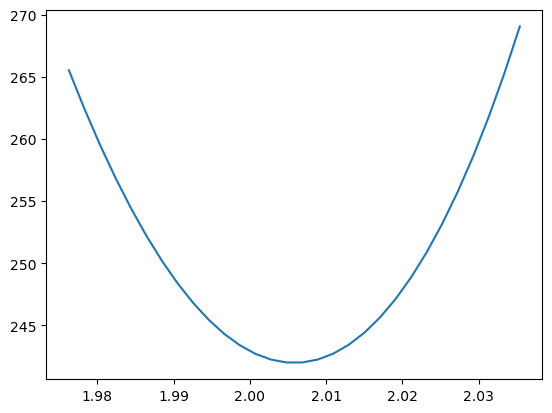

In [25]:
plt.plot(b1_profile[0], b1_profile[1])